In [1]:
import pandas as pd

# Load the dataset



# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any)
# Option 1: Remove rows with missing values
df.dropna(inplace=True)

# Option 2: Fill missing values with mean (or any other suitable method)
# df.fillna(df.mean(), inplace=True)

# Handle categorical variables (if any)
# Assuming all columns are numeric, no additional handling required

# Handle outliers
# Use appropriate techniques like Z-score, IQR, or domain knowledge to identify and handle outliers
# For simplicity, we'll use Z-score in this example

from scipy.stats import zscore

# Compute Z-scores for each numeric column
numeric_cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans',
                'fAlpha', 'fDist']
df[numeric_cols] = df[numeric_cols].apply(zscore)

# Remove outliers (rows with Z-score > 3 or < -3)
df = df[(df[numeric_cols] < 3).all(axis=1)]
df = df[(df[numeric_cols] > -3).all(axis=1)]

# Handle data transformation (if required)
# Apply suitable transformations like log transformation, scaling, etc.

# Save the cleaned dataset
df.to_csv('magic_cleaned.csv', index=False)


fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64


In [2]:
import pandas as pd

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data'
column_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans',
                'fAlpha', 'fDist', 'class']
df = pd.read_csv(url, names=column_names)

# Check for missing values
missing_values = df.isnull().sum().sum()
if missing_values > 0:
    print("The dataset contains missing values.")
else:
    print("The dataset does not have any missing values.")


The dataset does not have any missing values.


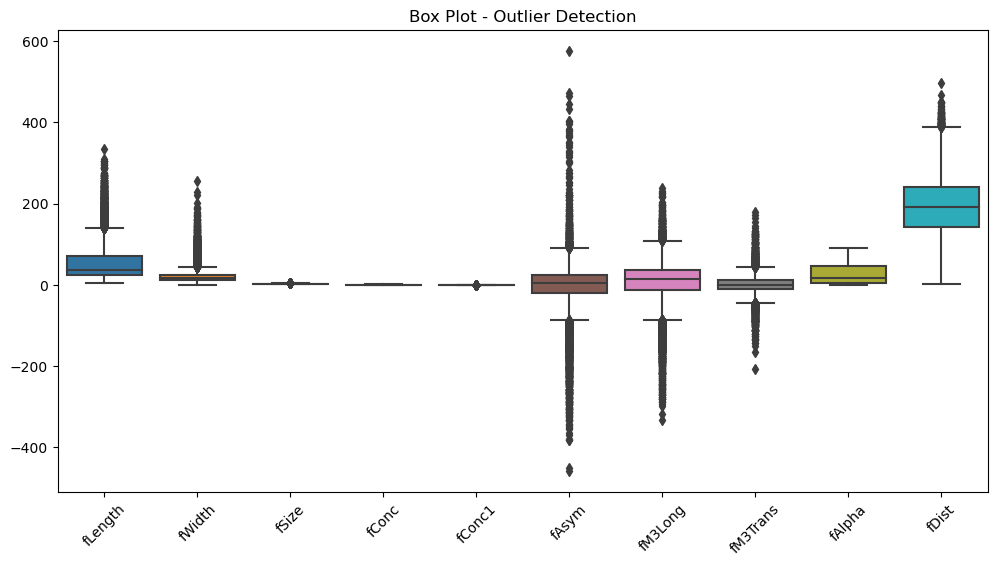

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data'
column_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans',
                'fAlpha', 'fDist', 'class']
df = pd.read_csv(url, names=column_names)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Box Plot - Outlier Detection')
plt.show()

numeric_cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans',
                'fAlpha', 'fDist']
z_scores = df[numeric_cols].apply(lambda x: (x - x.mean()) / x.std())


threshold = 3  
outliers = (z_scores.abs() > threshold).any(axis=1)

#print("Number of outliers detected using z-scores:", outliers.sum())

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

#print("Number of outliers detected using IQR:", outliers_iqr.sum())


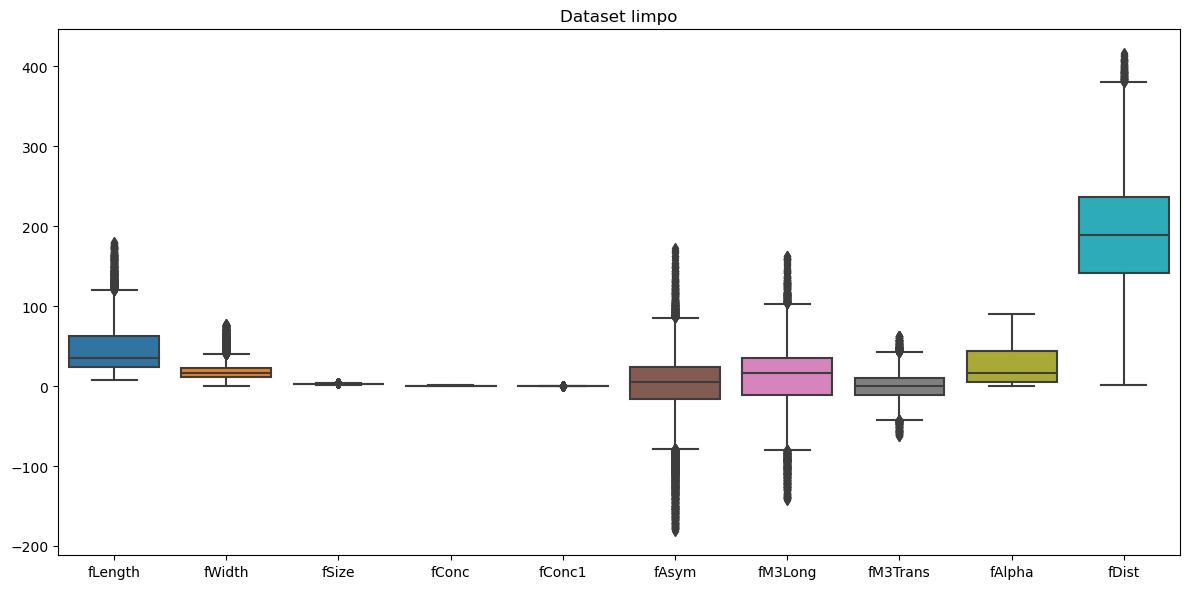

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mstats
import numpy as np


numeric_cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans',
                'fAlpha', 'fDist']
z_scores = df[numeric_cols].apply(lambda x: (x - x.mean()) / x.std())


threshold = 3  
outliers = (z_scores.abs() > threshold).any(axis=1)
df_cleaned = df[~outliers]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned)
plt.title('Dataset limpo')

plt.tight_layout()
plt.show()


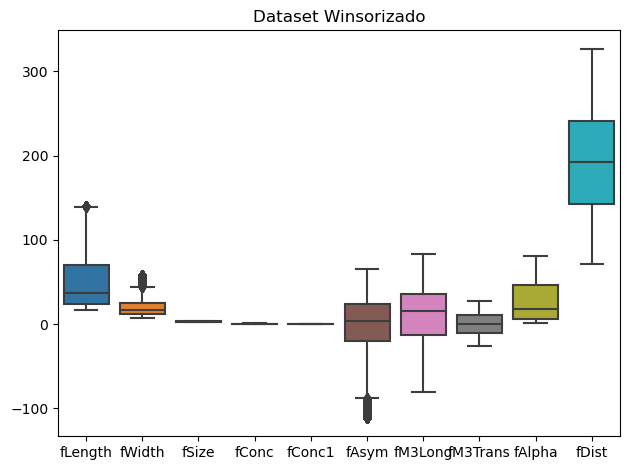

In [13]:
# Transform outliers using winsorization
df_winsorized = df.copy()
for col in numeric_cols:
    df_winsorized[col] = mstats.winsorize(df_winsorized[col], limits=[0.05, 0.05])
    
plt.subplot()
sns.boxplot(data=df_winsorized)
plt.title('Dataset Winsorizado')
plt.tight_layout()
plt.show()

In [20]:
import pandas as pd

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data'
column_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans',
                'fAlpha', 'fDist', 'class']
df = pd.read_csv(url, names=column_names)

# Check for inconsistencies or errors

# Verify the range of values for each attribute
ranges = {
    'fLength': (0, None),
    'fWidth': (0, None),
    'fSize': (0, None),
    'fConc': (0, 1),
    'fConc1': (0, 1),
    'fAsym': (None, None),  # No specific range mentioned in the dataset documentation
    'fM3Long': (None, None),  # No specific range mentioned in the dataset documentation
    'fM3Trans': (None, None),  # No specific range mentioned in the dataset documentation
    'fAlpha': (0, 360),  # Assuming degrees for fAlpha attribute
    'fDist': (0, None),
    'class': ('g', 'h')  # Assuming 'g' and 'h' as valid classes
}

for col, (min_val, max_val) in ranges.items():
    if min_val is not None:
        is_min_valid = (df[col] >= min_val)
        if not is_min_valid.all():
            print(f"Inconsistent values found in {col}: below the minimum value of {min_val}")
    if max_val is not None:
        is_max_valid = (df[col] <= max_val)
        if not is_max_valid.all():
            print(f"Inconsistent values found in {col}: above the maximum value of {max_val}")


Number of rows in the cleaned dataset: 17829
Number of columns in the cleaned dataset: 11



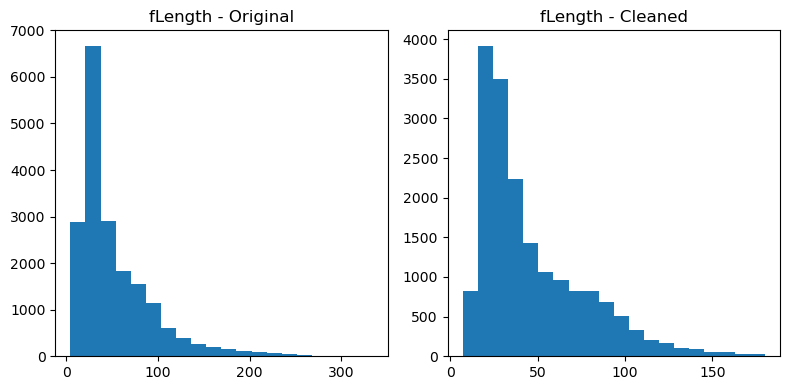

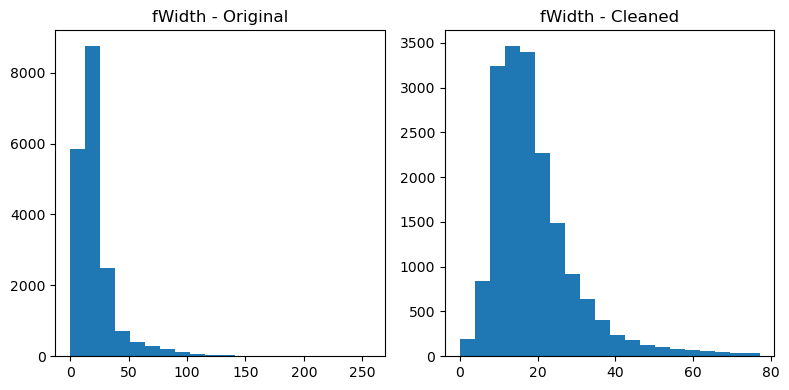

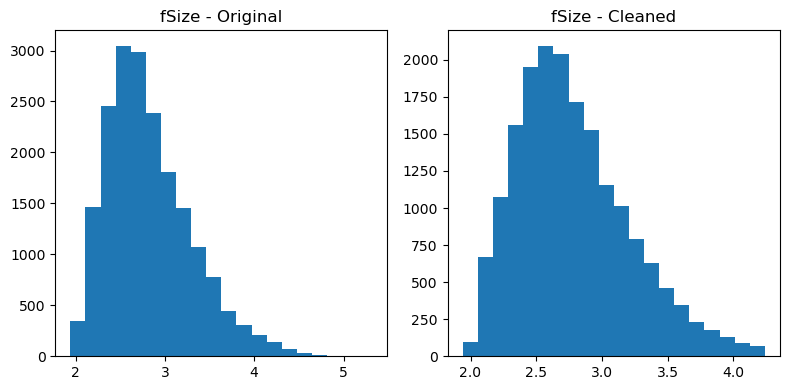

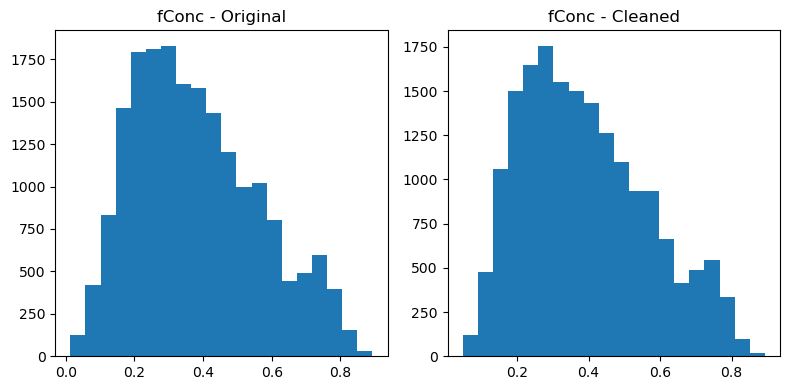

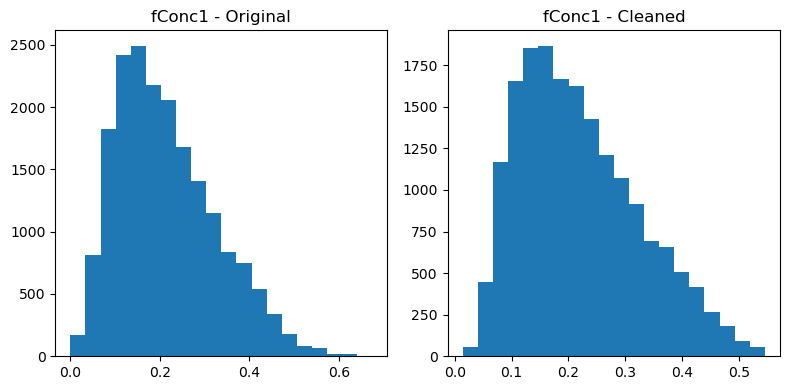

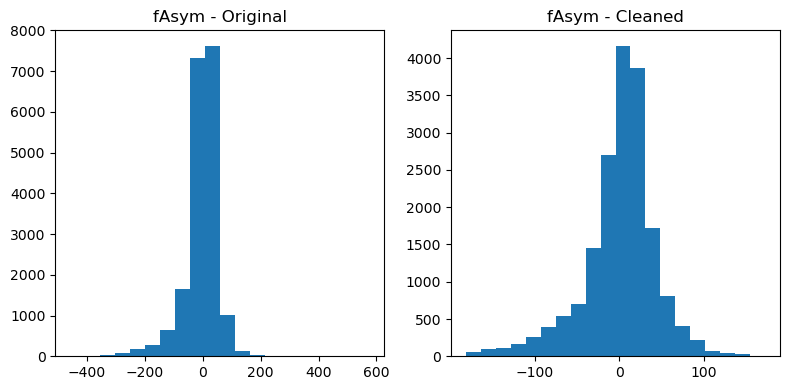

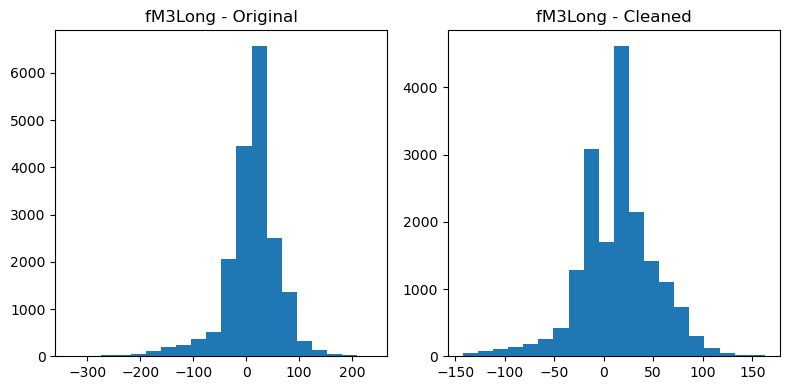

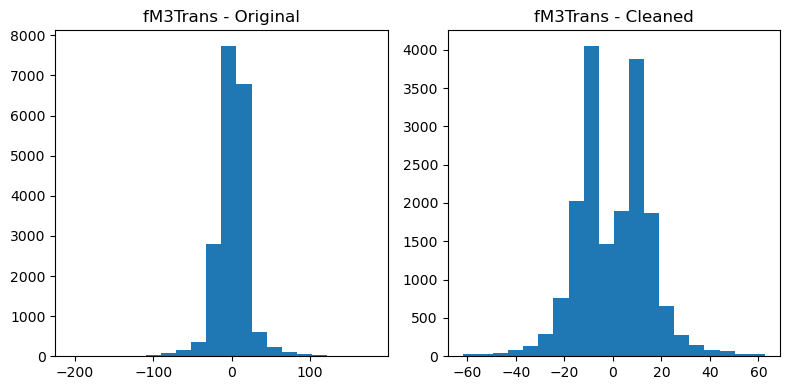

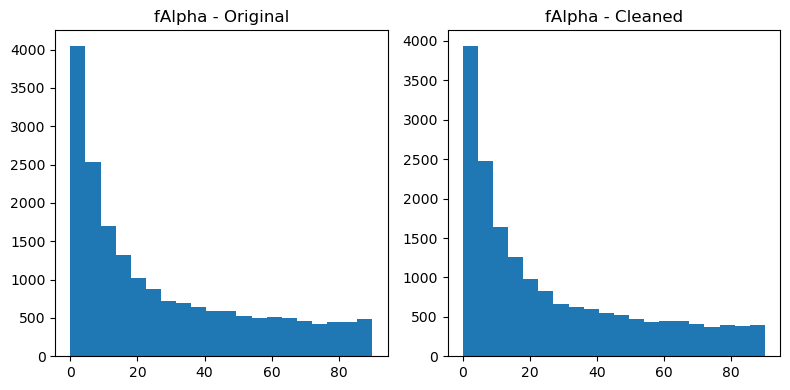

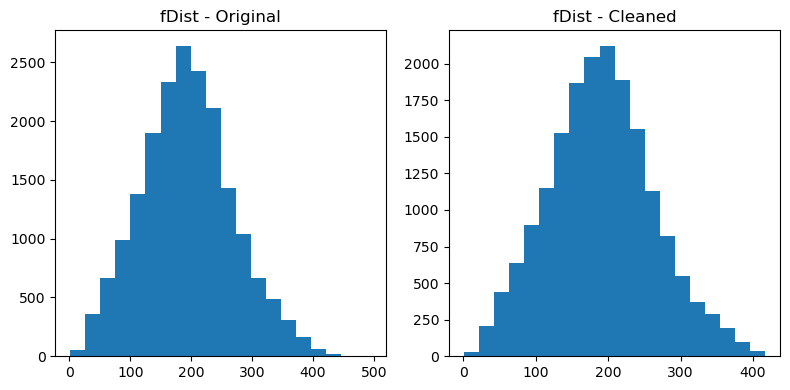

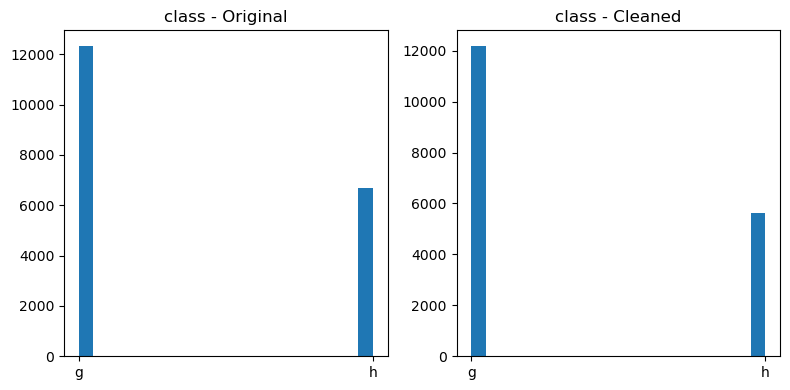

Summary Statistics - Original Dataset:
            fLength        fWidth         fSize         fConc        fConc1  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      53.250154     22.180966      2.825017      0.380327      0.214657   
std       42.364855     18.346056      0.472599      0.182813      0.110511   
min        4.283500      0.000000      1.941300      0.013100      0.000300   
25%       24.336000     11.863800      2.477100      0.235800      0.128475   
50%       37.147700     17.139900      2.739600      0.354150      0.196500   
75%       70.122175     24.739475      3.101600      0.503700      0.285225   
max      334.177000    256.382000      5.323300      0.893000      0.675200   

              fAsym       fM3Long      fM3Trans        fAlpha         fDist  
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000  
mean      -4.331745     10.545545      0.249726     27.645707    193.818026  
std       59.20

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the original and cleaned datasets
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data'
column_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans',
                'fAlpha', 'fDist', 'class']
df_original = pd.read_csv(url, names=column_names)
df_cleaned = df_cleaned  # Replace with the path to your cleaned dataset

# Sanity checks
# Check the number of rows and columns in the cleaned dataset
print("Number of rows in the cleaned dataset:", len(df_cleaned))
print("Number of columns in the cleaned dataset:", len(df_cleaned.columns))
print()

# Verify data distributions
# Compare histograms for each attribute before and after cleaning
for col in column_names:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.hist(df_original[col], bins=20)
    plt.title(f'{col} - Original')
    plt.subplot(1, 2, 2)
    plt.hist(df_cleaned[col], bins=20)
    plt.title(f'{col} - Cleaned')
    plt.tight_layout()
    plt.show()

# Compare summary statistics before and after cleaning
original_stats = df_original.describe()
cleaned_stats = df_cleaned.describe()

# Print summary statistics before and after cleaning
print("Summary Statistics - Original Dataset:")
print(original_stats)
print()
print("Summary Statistics - Cleaned Dataset:")
print(cleaned_stats)


In [26]:
import pandas as pd

# Load the cleaned dataset
df_cleaned = df_cleaned

# Cross-reference with dataset description or domain knowledge

# Verify the unique values for categorical attributes
categorical_cols = ['class']  # Add additional categorical columns if applicable
for col in categorical_cols:
    unique_values = df_cleaned[col].unique()
    print(f"Unique values for {col}: {unique_values}")

# Verify the distribution of values for each attribute
value_counts = {}
for col in df_cleaned.columns:
    value_counts[col] = df_cleaned[col].value_counts()

print("Value counts for each attribute:")
for col, counts in value_counts.items():
    print(f"\n{col}:")
    print(counts)

# Additional checks based on dataset description or domain knowledge
# ...



Unique values for class: ['g' 'h']
Value counts for each attribute:

fLength:
24.8332    3
19.1572    3
20.7522    3
26.9187    3
12.9176    3
          ..
29.3966    1
89.2164    1
99.4538    1
29.6974    1
75.4455    1
Name: fLength, Length: 17474, dtype: int64

fWidth:
0.0000     93
10.7539     4
0.0001      3
12.8155     3
18.7524     3
           ..
45.6576     1
16.2717     1
10.4433     1
12.3907     1
47.5305     1
Name: fWidth, Length: 17044, dtype: int64

fSize:
2.1508    27
2.1287    24
2.0774    24
2.1319    23
2.1351    22
          ..
2.8522     1
3.6964     1
3.2222     1
3.2388     1
2.8307     1
Name: fSize, Length: 6536, dtype: int64

fConc:
0.6000    16
0.4116    12
0.4000    12
0.2408    11
0.2979    11
          ..
0.3355     1
0.4775     1
0.6391     1
0.7359     1
0.5857     1
Name: fConc, Length: 6110, dtype: int64

fConc1:
0.1940    18
0.2000    16
0.2126    16
0.1939    15
0.2251    15
          ..
0.4072     1
0.5065     1
0.2299     1
0.4003     1
0.0549    